<a href="https://colab.research.google.com/github/zar7364/DataScience/blob/main/Pyspark_Water_Quality_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pyspark

     |████████████████████████████████| 204.2MB 54kB/s 
     |████████████████████████████████| 204kB 43.8MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=ac1193a0ef96f844ddd7fdd32063f745ba64f429205106d5a4b8d6b0f0a29b25
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [4]:
pip install geopandas

     |████████████████████████████████| 972kB 4.4MB/s 
     |████████████████████████████████| 14.8MB 349kB/s 
     |████████████████████████████████| 6.5MB 36.2MB/s 


In [5]:
#https://www.kaggle.com/utcarshagrawal/water-quality-prediction-using-sparkml

import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

from pylab import *
from pyspark.sql.functions import udf, concat, col, lit
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .getOrCreate()
sqlContext = SQLContext(sc)

In [6]:
from google.colab import drive

In [7]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [8]:
data_csv=('/content/drive/My Drive/Colab Notebooks/SparkML/waterquality.csv')
data_shp=('/content/drive/My Drive/Colab Notebooks/SparkML/Indian_States.shp')

In [9]:
df = spark.read.format("csv").option("header", "true").load(data_csv)
gdf = gpd.read_file(data_shp)

In [10]:
df.show()

+------------+--------------------+--------------+----+---+---+------------+----+-------------------+--------------+--------------+
|STATION CODE|           LOCATIONS|         STATE|TEMP| DO| pH|CONDUCTIVITY| BOD|NITRATE_N_NITRITE_N|FECAL_COLIFORM|TOTAL_COLIFORM|
+------------+--------------------+--------------+----+---+---+------------+----+-------------------+--------------+--------------+
|        1312|GODAVARI AT JAYAK...|   MAHARASHTRA|29.2|6.4|8.1|         735| 3.4|                  2|             3|            73|
|        2177|GODAVARI RIVER NE...|   MAHARASHTRA|24.5|  6|  8|         270| 3.1|                  2|            72|           182|
|        2182|GODAVARI RIVER AT...|   MAHARASHTRA|25.8|5.5|7.8|         355| 4.2|                  9|            59|           133|
|        2179|GODAVARI RIVER AT...|   MAHARASHTRA|24.8|5.5|7.8|         371| 5.6|               3.55|            90|           283|
|        2183|GODAVARI RIVER AT...|   MAHARASHTRA|25.7|5.7|7.9|         294|

In [11]:
gdf

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [12]:
df.dtypes

[('STATION CODE', 'string'),
 ('LOCATIONS', 'string'),
 ('STATE', 'string'),
 ('TEMP', 'string'),
 ('DO', 'string'),
 ('pH', 'string'),
 ('CONDUCTIVITY', 'string'),
 ('BOD', 'string'),
 ('NITRATE_N_NITRITE_N', 'string'),
 ('FECAL_COLIFORM', 'string'),
 ('TOTAL_COLIFORM', 'string')]

In [13]:
#Data Cleaning
from pyspark.sql.types import FloatType

In [14]:
df=df.withColumn("TEMP",df["TEMP"].cast(FloatType()))
df=df.withColumn("DO",df["DO"].cast(FloatType()))
df=df.withColumn("pH",df["pH"].cast(FloatType()))
df=df.withColumn("CONDUCTIVITY",df["CONDUCTIVITY"].cast(FloatType()))
df=df.withColumn("BOD",df["BOD"].cast(FloatType()))
df=df.withColumn("NITRATE_N_NITRITE_N",df["NITRATE_N_NITRITE_N"].cast(FloatType()))
df=df.withColumn("FECAL_COLIFORM",df["FECAL_COLIFORM"].cast(FloatType()))
df=df.withColumn("TOTAL_COLIFORM",df["TOTAL_COLIFORM"].cast(FloatType()))
df.dtypes

[('STATION CODE', 'string'),
 ('LOCATIONS', 'string'),
 ('STATE', 'string'),
 ('TEMP', 'float'),
 ('DO', 'float'),
 ('pH', 'float'),
 ('CONDUCTIVITY', 'float'),
 ('BOD', 'float'),
 ('NITRATE_N_NITRITE_N', 'float'),
 ('FECAL_COLIFORM', 'float'),
 ('TOTAL_COLIFORM', 'float')]

In [15]:
df=df.drop("TOTAL_COLIFORM")

In [16]:
#Probably this using NoSQL because using df.head() shows MongoDB view
df.show()

+------------+--------------------+--------------+----+---+---+------------+----+-------------------+--------------+
|STATION CODE|           LOCATIONS|         STATE|TEMP| DO| pH|CONDUCTIVITY| BOD|NITRATE_N_NITRITE_N|FECAL_COLIFORM|
+------------+--------------------+--------------+----+---+---+------------+----+-------------------+--------------+
|        1312|GODAVARI AT JAYAK...|   MAHARASHTRA|29.2|6.4|8.1|       735.0| 3.4|                2.0|           3.0|
|        2177|GODAVARI RIVER NE...|   MAHARASHTRA|24.5|6.0|8.0|       270.0| 3.1|                2.0|          72.0|
|        2182|GODAVARI RIVER AT...|   MAHARASHTRA|25.8|5.5|7.8|       355.0| 4.2|                9.0|          59.0|
|        2179|GODAVARI RIVER AT...|   MAHARASHTRA|24.8|5.5|7.8|       371.0| 5.6|               3.55|          90.0|
|        2183|GODAVARI RIVER AT...|   MAHARASHTRA|25.7|5.7|7.9|       294.0| 3.2|               2.69|          45.0|
|        2181|GODAVARI RIVER AT...|   MAHARASHTRA|25.0|4.5|7.5| 

In [17]:
#Now we want to remove all the rows which contain any null value in it. So for applying a SQL query we first have to register it has a virtual temporary table and then we will issue SQL query. We are doing this because it is important to perform data cleansing steps as it will make our model to work better.
df.createOrReplaceTempView("df_sql")

In [18]:
df_clean=spark.sql('''SELECT * FROM df_sql where
TEMP is not null and 
DO is not null and 
pH is not null and 
BOD is not null and 
CONDUCTIVITY is not null and 
NITRATE_N_NITRITE_N is not null and 
FECAL_COLIFORM is not null''')

In [19]:
df_clean.show(5)

+------------+--------------------+-----------+----+---+---+------------+---+-------------------+--------------+
|STATION CODE|           LOCATIONS|      STATE|TEMP| DO| pH|CONDUCTIVITY|BOD|NITRATE_N_NITRITE_N|FECAL_COLIFORM|
+------------+--------------------+-----------+----+---+---+------------+---+-------------------+--------------+
|        1312|GODAVARI AT JAYAK...|MAHARASHTRA|29.2|6.4|8.1|       735.0|3.4|                2.0|           3.0|
|        2177|GODAVARI RIVER NE...|MAHARASHTRA|24.5|6.0|8.0|       270.0|3.1|                2.0|          72.0|
|        2182|GODAVARI RIVER AT...|MAHARASHTRA|25.8|5.5|7.8|       355.0|4.2|                9.0|          59.0|
|        2179|GODAVARI RIVER AT...|MAHARASHTRA|24.8|5.5|7.8|       371.0|5.6|               3.55|          90.0|
|        2183|GODAVARI RIVER AT...|MAHARASHTRA|25.7|5.7|7.9|       294.0|3.2|               2.69|          45.0|
+------------+--------------------+-----------+----+---+---+------------+---+-------------------

In [20]:
#EDA
df_clean.createOrReplaceTempView("df_sql")

In [21]:
do = spark.sql("Select DO from df_sql")
do = do.rdd.map(lambda row : row.DO).collect()
ph = spark.sql("Select pH from df_sql")
ph = ph.rdd.map(lambda row : row.pH).collect()
bod = spark.sql("Select BOD from df_sql")
bod = bod.rdd.map(lambda row : row.BOD).collect()
nn = spark.sql("Select NITRATE_N_NITRITE_N from df_sql")
nn = nn.rdd.map(lambda row : row.NITRATE_N_NITRITE_N).collect()

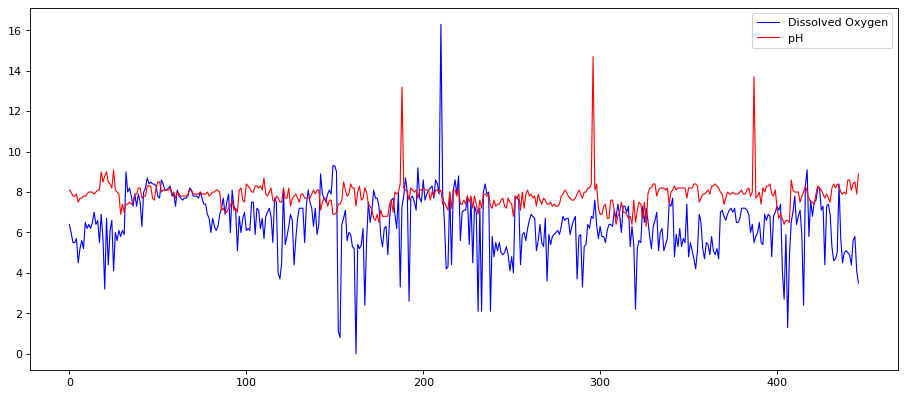

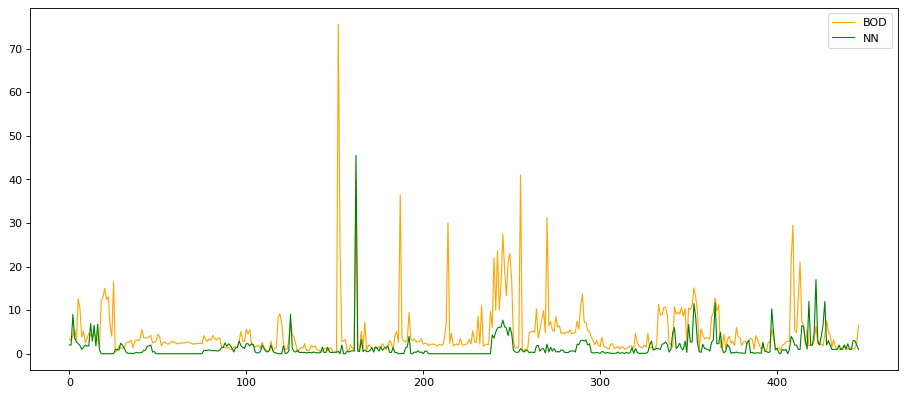

In [22]:
fig,ax = plt.subplots(num=None,figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
size=len(do)
ax.plot(range(0,size), do, color='blue', animated=True, linewidth=1, label='Dissolved Oxygen')
ax.plot(range(0,size), ph, color='red', animated=True, linewidth=1, label='pH')
fig,ax2 = plt.subplots(num=None,figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax2.plot(range(0,size), bod, color='orange', animated=True, linewidth=1, label='BOD')
ax2.plot(range(0,size), nn, color='green', animated=True, linewidth=1, label='NN')
legend=ax.legend()
legend=ax2.legend()

In [23]:


con = spark.sql("Select CONDUCTIVITY from df_sql")
con = con.rdd.map(lambda row : row.CONDUCTIVITY).collect()
fec = spark.sql("Select FECAL_COLIFORM from df_sql")
fec = fec.rdd.map(lambda row : row.FECAL_COLIFORM).collect()



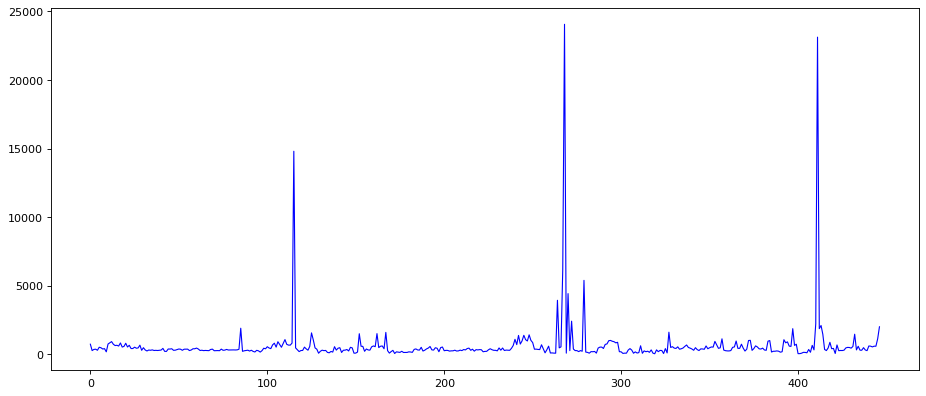

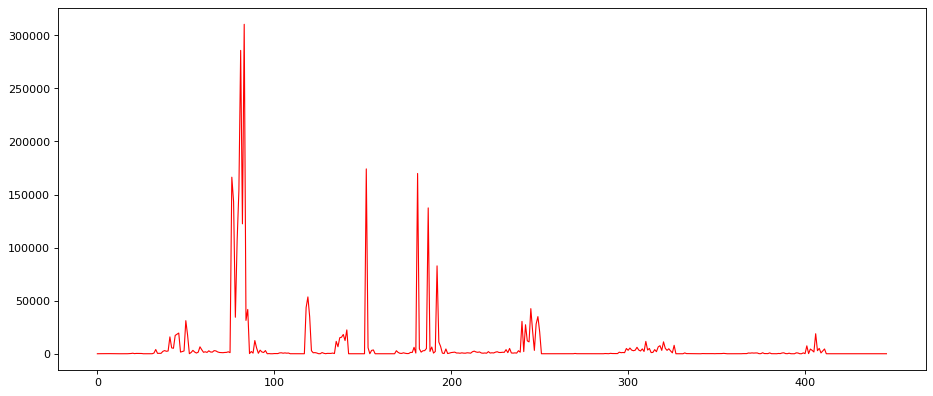

In [24]:
fig,ax = plt.subplots(num=None,figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(range(0,size), con, color='blue', animated=True, linewidth=1)
fig,ax2 = plt.subplots(num=None,figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax2.plot(range(0,size), fec, color='red', animated=True, linewidth=1)

In [25]:
#Featured Engineering
#Let us convert our data to pandas frame. We are doing this because to train a model we need what we have to predict which is not in data. So we have to calculate water quality index which requires many steps but can be easily done using pandas and in less number of steps. Also we will able to visualize our data in tabular form more effectively.


In [26]:
df=df_clean.toPandas()
df.dtypes

STATION CODE            object
LOCATIONS               object
STATE                   object
TEMP                   float32
DO                     float32
pH                     float32
CONDUCTIVITY           float32
BOD                    float32
NITRATE_N_NITRITE_N    float32
FECAL_COLIFORM         float32
dtype: object

In [27]:
start=0
end=448
station=df.iloc [start:end ,0]
location=df.iloc [start:end ,1]
state=df.iloc [start:end ,2]
do= df.iloc [start:end ,4].astype(np.float64)
value=0
ph = df.iloc[ start:end,5]  
co = df.iloc [start:end ,6].astype(np.float64)
bod = df.iloc [start:end ,7].astype(np.float64)
na= df.iloc [start:end ,8].astype(np.float64)
fc=df.iloc [2:end ,9].astype(np.float64)

In [28]:
df=pd.concat([station,location,state,do,ph,co,bod,na,fc],axis=1)
df. columns = ['station','location','state','do','ph','co','bod','na','fc']

In [ ]:

#The Water Quality Index is calculated by aggregating the quality rating with the weight linearly,
#WQI = ∑ (qn x Wn)
#where qn =Quality rating for the nth Water quality parameter, Wn= unit weight for the nth parameters.
#Although for calculation qn we have standard formula but it was not possible in this case, so we applied a standard method for calculating quality rating for each parameter.


In [29]:


df['npH']=df.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))



In [32]:
df['ndo']=df.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

In [31]:
df['nco']=df.fc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

In [33]:
df['nbdo']=df.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

In [34]:
df['nec']=df.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

In [35]:
df['nna']=df.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [36]:
df.head()

,station,location,state,do,ph,co,bod,na,fc,npH,ndo,nco,nbdo,nec,nna
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,6.4,8.1,735.0,3.4,2.00,NaN,100,100,0,80,0,100
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,6.0,8.0,270.0,3.1,2.00,NaN,100,100,0,80,40,100
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,5.5,7.8,355.0,4.2,9.00,59.0,100,80,60,80,0,100
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,5.5,7.8,371.0,5.6,3.55,90.0,100,80,60,80,0,100
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,5.7,7.9,294.0,3.2,2.69,45.0,100,80,80,80,40,100


In [37]:
df.dtypes

station      object
location     object
state        object
do          float64
ph          float32
co          float64
bod         float64
na          float64
fc          float64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [38]:
#Now we apply the formula of wqi by first multiplying all the quality rating with its weight and then summed all the values
df['wph']=df.npH * 0.165
df['wdo']=df.ndo * 0.281
df['wbdo']=df.nbdo * 0.234
df['wec']=df.nec* 0.009
df['wna']=df.nna * 0.028
df['wco']=df.nco * 0.281
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco 
df

,station,location,state,do,ph,co,bod,na,fc,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,6.4,8.1,735.0,3.4,2.00,NaN,100,100,0,80,0,100,16.5,28.10,18.72,0.00,2.8,0.00,66.12
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,6.0,8.0,270.0,3.1,2.00,NaN,100,100,0,80,40,100,16.5,28.10,18.72,0.36,2.8,0.00,66.48
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,5.5,7.8,355.0,4.2,9.00,59.0,100,80,60,80,0,100,16.5,22.48,18.72,0.00,2.8,16.86,77.36
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,5.5,7.8,371.0,5.6,3.55,90.0,100,80,60,80,0,100,16.5,22.48,18.72,0.00,2.8,16.86,77.36
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,5.7,7.9,294.0,3.2,2.69,45.0,100,80,80,80,40,100,16.5,22.48,18.72,0.36,2.8,22.48,83.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,2940,"GAPE- SAGAR LAKE, DUNGARPUR, RAJASTHAN",RAJASTHAN,4.4,8.1,538.0,1.2,1.00,5.0,100,60,100,100,0,100,16.5,16.86,23.40,0.00,2.8,28.10,87.66
443,2941,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 1...",RAJASTHAN,5.6,8.4,591.0,1.1,3.00,4.0,100,80,100,100,0,100,16.5,22.48,23.40,0.00,2.8,28.10,93.28
444,2942,"LAKE JAISAMAND, SALUMBER, UDAIPUR, POINT NO. 2...",RAJASTHAN,5.8,8.5,588.0,1.2,3.00,4.0,100,80,100,100,0,100,16.5,22.48,23.40,0.00,2.8,28.10,93.28
445,2943,"LODHA TALAB, BANSWARA- DUNGARPUR ROAD, BANSWAR...",RAJASTHAN,4.1,7.9,1133.0,2.3,2.00,7.0,100,0,80,100,0,100,16.5,0.00,23.40,0.00,2.8,22.48,65.18


In [40]:
#Then we classify the water on the basis of their water quality index
df['quality']=df.wqi.apply(lambda x:('Excellent' if (25>=x>=0)  
                                 else('Good' if  (50>=x>=26) 
                                      else('Poor' if (75>=x>=51)
                                          else('Very Poor' if (100>=x>=76) 
                                              else 'Unsuitable')))))

In [41]:
#Let's visualize the water quality index in each state of India.
#renaming state names
gdf['st_nm'].replace({"Andaman & Nicobar Island": "Andaman and Nicobar Islands",
                      "Arunanchal Pradesh": "Arunachal Pradesh",
                      'Dadara & Nagar Havelli':'Dadra and Nagar Haveli and Daman and Diu',
                      'Jammu & Kashmir':'Jammu and Kashmir',
                      'NCT of Delhi':'Delhi'}, inplace=True)
df['state'].replace({"TAMILNADU": "TAMIL NADU"}, inplace=True)

#Capitalizing only the first letter of each word
df['state'] = df['state'].str.title()

In [ ]:
pip install mapclassify

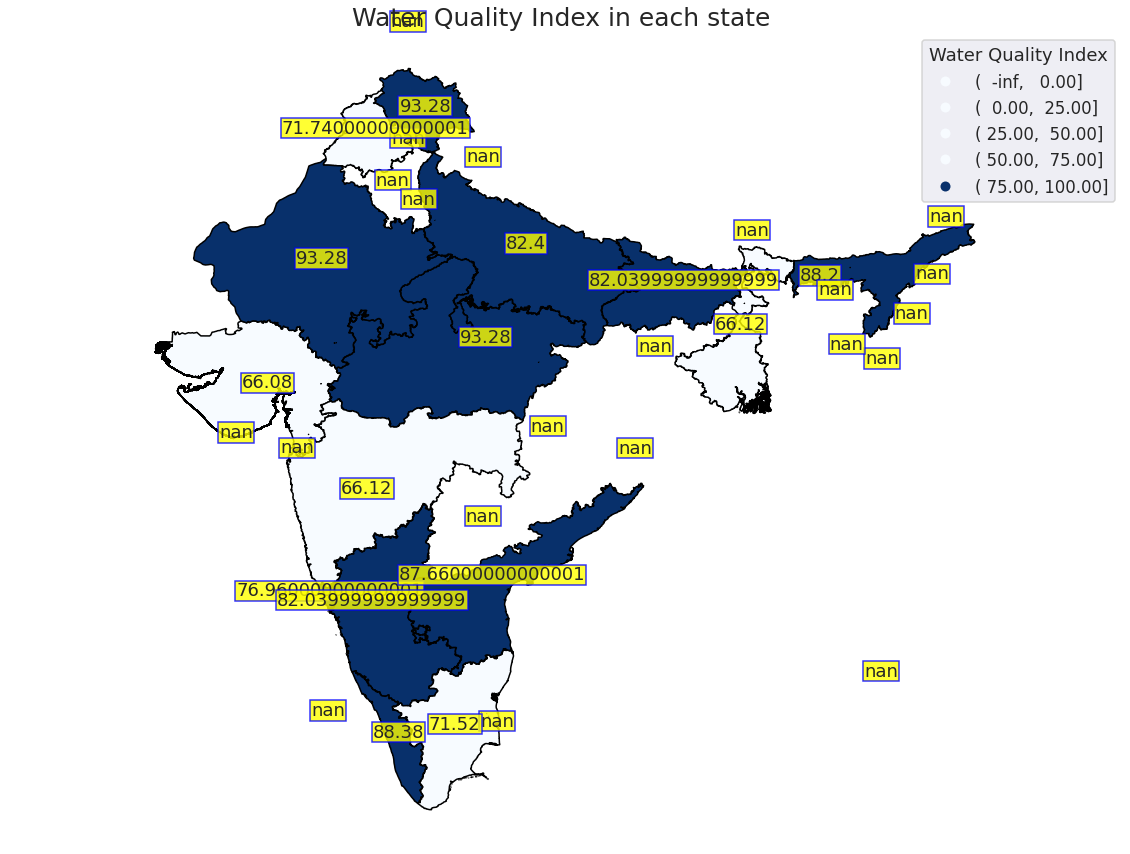

In [48]:
gdf = gdf.rename(columns={"st_nm": "state"})
merged = pd.merge(gdf, df , how='outer', on='state')
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
merged = merged.drop_duplicates(subset ="state") 

sns.set_context("talk")
sns.set_style("dark")
cmap = 'Blues'
figsize = (20, 15)
ax = merged.plot(column= 'wqi', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[0,25,50,75,100]),
                          edgecolor='black', legend = True)
for idx, row in merged.iterrows():
    ax.text(row.coords[0], row.coords[1], s=row['wqi'], horizontalalignment='center', bbox={'facecolor': 'yellow', 'alpha':0.8, 'pad': 1, 'edgecolor':'blue'})

ax.get_legend().set_title('Water Quality Index')
ax.set_title("Water Quality Index in each state ", size = 25)

ax.set_axis_off()
plt.axis('equal')
plt.show()

In [50]:
spark_df = sqlContext.createDataFrame(df)

In [52]:
spark_df.show()

+-------+--------------------+--------------+-----------------+-----------------+-----+------------------+------------------+-----+---+---+---+----+---+---+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+---------+
|station|            location|         state|               do|               ph|   co|               bod|                na|   fc|npH|ndo|nco|nbdo|nec|nna|               wph|               wdo|              wbdo|               wec|               wna|               wco|              wqi|  quality|
+-------+--------------------+--------------+-----------------+-----------------+-----+------------------+------------------+-----+---+---+---+----+---+---+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+---------+
|   1312|GODAVARI AT JAYAK...|   Maharashtra|6.400000095367432|8.100000381469727|735.0|3.40000009536743

In [53]:
spark_df.createOrReplaceTempView("df_sql")

In [54]:
State = spark.sql("Select state from df_sql")
State = State.rdd.map(lambda row : row.state).collect()

In [55]:
Wqi = spark.sql("Select wqi from df_sql")
Wqi = Wqi.rdd.map(lambda row : row.wqi).collect()

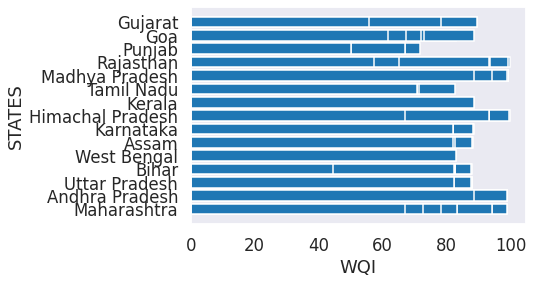

In [56]:
plt.barh(State,Wqi)

plt.xlabel("WQI")
plt.ylabel("STATES")


plt.show()

In [58]:
#Model Creation
#Non Deep Learning Based Linear Regresion Model
#In this, first data is converted which are required to predict WQI into vector form by using VectorAssembler. Then we normalize our data by using Normalizer.

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer

vectorAssembler = VectorAssembler(inputCols=["npH","ndo","nbdo","nec","nna","nco"], outputCol="features")
normalizer = Normalizer(inputCol="features",outputCol="features_norm")

In [ ]:
#Then import LinearRegression from pyspark.ml.regression and applied it to our normalized data. Afterthat, import Pipeline from pyspark.ml and include all those steps in the pipeline that have been done.

In [59]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="features_norm",labelCol="wqi",maxIter=10,regParam=0.3,elasticNetParam=0.2)

In [60]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler,normalizer,lr])


In [61]:
#Before training, our data is randomly split in two parts so as to avoid overfitting and then training is done.
train_data,test_data=spark_df.randomSplit([0.8,0.2])

In [62]:
model = pipeline.fit(train_data)

In [63]:
predictions = model.transform(train_data)

In [64]:
predictions.select("wqi","prediction").show()

+-----------------+-----------------+
|              wqi|       prediction|
+-----------------+-----------------+
|82.03999999999999|82.16096557341137|
|             82.4| 81.9344159552698|
|             82.4| 81.9344159552698|
|            66.12|67.69419245596295|
|            66.12|67.69419245596295|
|            66.12|67.69419245596295|
|             82.4| 81.9344159552698|
|             82.4| 81.9344159552698|
|77.36000000000001|77.93824100840715|
|            66.12|67.69419245596295|
|82.03999999999999|82.16096557341137|
|82.03999999999999|82.16096557341137|
|            66.12|67.69419245596295|
|82.03999999999999|82.16096557341137|
|             82.4| 81.9344159552698|
|             82.4| 81.9344159552698|
|82.03999999999999|82.16096557341137|
|             82.4| 81.9344159552698|
|            66.12|67.69419245596295|
|93.82000000000001|91.34740357802056|
+-----------------+-----------------+
only showing top 20 rows



In [65]:
#Check Performance Model
model.stages[2].summary.r2

0.9786305109701936

In [66]:
#Deep Learning Based Linear Regression Model
#In this first we collect our data in an array form and to reduce number of steps we converted our data in pandas frame.

In [67]:
df=spark_df.toPandas()

In [68]:
data = df.iloc[:,9:15].values
pred = df.iloc[:,21:22].values

In [69]:
from sklearn.model_selection import train_test_split 
data_train,data_test,pred_train,pred_test = train_test_split(data,pred,test_size=0.20,random_state=1)
pred_train.shape

(357, 1)

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [71]:
#Then we initialize model and add layers to it. Afterwards, the model is compiled with optimizer Adam and loss function mean squared error and then training is done.

In [72]:
model2 = Sequential()
model2.add(Dense(350,input_dim=6, activation='relu'))
model2.add(Dense(350,activation='relu'))
model2.add(Dense(350,activation='relu'))
model2.add(Dense(1,activation='linear'))

In [73]:
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False )
model2.compile(loss='mean_squared_error',optimizer='Adam', metrics=['mse'])

In [74]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 350)               2450      
_________________________________________________________________
dense_1 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_2 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 351       
Total params: 248,501
Trainable params: 248,501
Non-trainable params: 0
_________________________________________________________________


In [75]:
perform = model2.fit(data_train,pred_train,epochs=50,batch_size=32)

Epoch 1/50
12/12 [==============================] - 0s 4ms/step - loss: 1103.2122 - mse: 1103.2122
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 88.7645 - mse: 88.7645
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 31.3966 - mse: 31.3966
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 7.9101 - mse: 7.9101
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 2.0477 - mse: 2.0477
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.9033 - mse: 0.9033
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4105 - mse: 0.4105
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2128 - mse: 0.2128
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 0.1660 - mse: 0.1660
Epoch 10/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1303 - mse: 0.1303
Epoch 11/50
12/12 [==============================] - 0s 3ms

In [76]:


prediction = model2.predict(data_train)



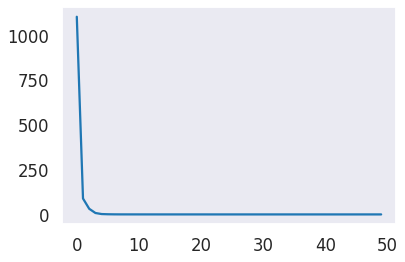

In [77]:
#Now we check performance of our model
plt.plot(perform.history['loss'])

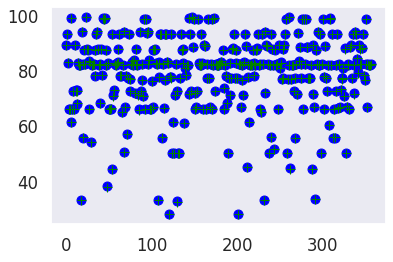

In [78]:
plt.plot(pred_train,'bo',prediction,'g+')

In [79]:
#Water Quality Prediction
spark_df = sqlContext.createDataFrame(df)

In [80]:
#Logistic Regression Model
#Here we are creating a logistic regression model because we don't have to predict a continuous value.

In [81]:
from pyspark.ml.feature import StringIndexer

In [83]:
#As our quality column contains values in string format so first we indexed them using StringIndexer. Then data is converted which are required to predict water quality into vector form by using VectorAssembler. Then we normalize our data by using Normalizer.

In [85]:
indexer = StringIndexer(inputCol="quality",outputCol="label")
vectorAssembler2 = VectorAssembler(inputCols=["npH","ndo","nbdo","nec","nna","nco","wqi"], outputCol="features2")
normalizer2 = Normalizer(inputCol="features2",outputCol="features_norm2")

In [86]:
#Then import LogisticRegression from pyspark.ml.classification and applied it to our normalized data. Afterthat, import Pipeline from pyspark.ml and include all those steps in the pipeline that have been done.

In [87]:
from pyspark.ml.classification import LogisticRegression

In [88]:
lor = LogisticRegression(featuresCol="features_norm2",labelCol="label",maxIter=10)

In [89]:
pipeline2 = Pipeline(stages=[indexer,vectorAssembler2,normalizer2,lor])

In [90]:
train_data,test_data=spark_df.randomSplit([0.8,0.2])

In [91]:
model3 = pipeline2.fit(train_data)

In [92]:
predictions2 = model3.transform(train_data)

In [94]:
#Now Let's check our predictions
predictions2.select("label","prediction").show()

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       1.0|
+-----+----------+
only showing top 20 rows



In [95]:
#Now we check performance of our model.¶
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
eval = MulticlassClassificationEvaluator().setMetricName('accuracy').setLabelCol('label').setPredictionCol('prediction')
eval.evaluate(predictions2)

0.9566395663956639

In [ ]:
#As the quality column is in string format so we convert our predicted data which are in numbers to their real string values and compared with the actual data.

In [96]:
names = ["Very Poor","Poor","Good","Unsuitable","Excellent"]

In [97]:
predictions2.createOrReplaceTempView("predictions2_sql")

In [98]:
pred = spark.sql("Select prediction from predictions2_sql")
pred = pred.rdd.map(lambda row : int(row.prediction)).collect()
qua = spark.sql("Select quality from predictions2_sql")
qua = qua.rdd.map(lambda row : row.quality).collect()

In [99]:
for x in range(100):
    print("Predicted:", names[pred[x]], "Actual:", qua[x])

Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Poor Actual: Poor
Predicted: Poor Actual: Poor
Predicted: Poor Actual: Poor
Predicted: Poor Actual: Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Poor Actual: Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Poor Actual: Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Poor Actual: Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very Poor Actual: Very Poor
Predicted: Very P